<a href="https://colab.research.google.com/github/Puneetgupta2301/Cat_Dog_prediction/blob/main/Dog_and_cat_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 122MB/s]
100% 1.06G/1.06G [00:08<00:00, 140MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D,Dropout,BatchNormalization

In [5]:
validation_ds =keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds, epochs=10,validation_data=validation_ds)

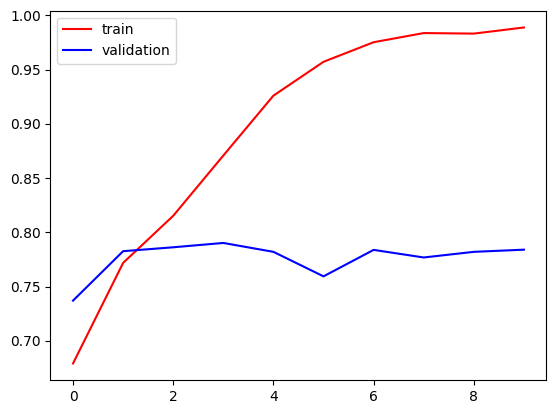

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

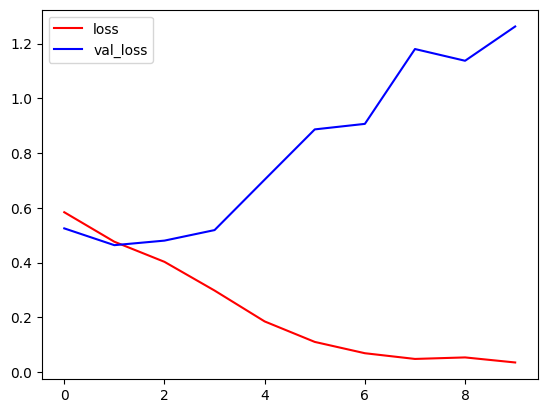

In [17]:
plt.plot(history.history['loss'], color='red',label='loss')
plt.plot(history.history['val_loss'], color='blue',label='val_loss')
plt.legend()
plt.show()

In [27]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 56s 90ms/step - loss: 0.6767 - accuracy: 0.6573 - val_loss: 0.5957 - val_accuracy: 0.6876
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5040 - accuracy: 0.7510 - val_loss: 0.5300 - val_accuracy: 0.7324
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4339 - accuracy: 0.8018 - val_loss: 0.4904 - val_accuracy: 0.7670
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3571 - accuracy: 0.8412 - val_loss: 0.4485 - val_accuracy: 0.7972
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2741 - accuracy: 0.8849 - val_loss: 0.5637 - val_accuracy: 0.7990
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1908 - accuracy: 0.9222 - val_loss: 0.8182 - val_accuracy: 0.7332
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1289 - accuracy: 0.9502 - val_loss: 0.9416 - val_accurac

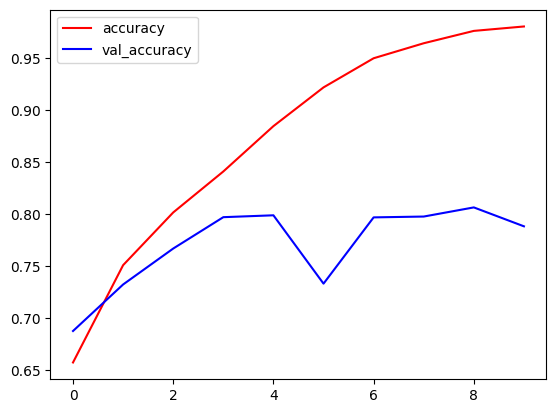

In [30]:
plt.plot(history.history['accuracy'], color='red',label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue',label='val_accuracy')
plt.legend()
plt.show()

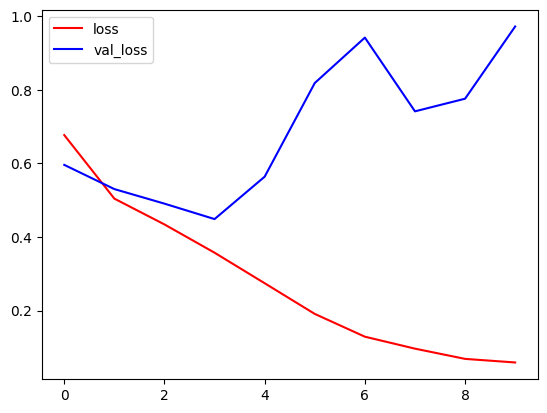

In [31]:
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue',label='val_loss')
plt.legend()
plt.show()

In [32]:
import cv2

In [33]:
test_image=cv2.imread('/content/cat image')


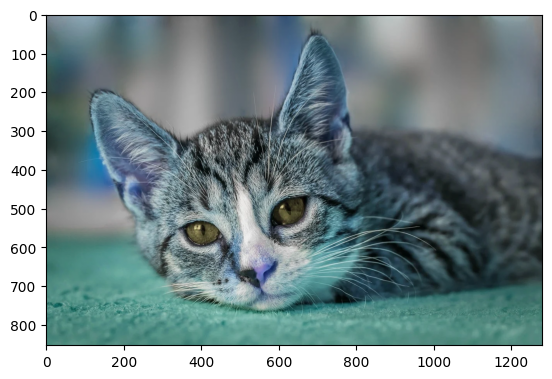

In [36]:
plt.imshow(test_image)

In [38]:
test_image.shape

(853, 1280, 3)

In [40]:
test_img=cv2.resize(test_image, (256,256))

In [41]:
test_input=test_img.reshape((1,256,256,3))

In [44]:
y_pred=model.predict(test_input)


1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [47]:
import numpy as np

def classify_prediction(y_pred):
    # Assuming y_pred is a numpy array
    if y_pred[0, 0] == 0:
        return "Cat"
    else:
        return "Dog"


In [48]:
print(classify_prediction(y_pred))

Cat
